In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from scipy.stats import ks_2samp
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("./all_data_minmax.csv", index_col=0)
lab_columns = data.columns.values[1:]

In [ ]:
data

In [12]:
l = 'LACTATE'
LOS_med = data['los'].dropna().median()
cond_less = (data.mort_icu==0) & (data.los < LOS_med)
n_nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna().count()
n_nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna().count()
n_less_min = data[l.lower()+'_min'][cond_less].dropna().count()
n_less_max = data[l.lower()+'_max'][cond_less].dropna().count()
quater = n_less / 4

In [14]:
print n_nonsurv_min
print n_nonsurv_max
print n_less_min
print n_less_max
print quater

2507
2507
9148
9148
2287


In [15]:
nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna()
nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna()

In [16]:
nonsurv_min.shape

(2507,)

In [17]:
first_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna().head(quater)
first_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna().head(quater)

In [20]:
first_quater_min.shape

(2287,)

In [21]:
sec_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater:quater*2]
sec_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater:quater*2]

In [22]:
sec_quater_min.shape

(2287,)

In [23]:
third_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*2:quater*3]
third_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*2:quater*3]

In [24]:
third_quater_min.shape

(2287,)

In [25]:
fourth_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*3:]
fourth_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*3:]

In [26]:
fourth_quater_min.shape

(2287,)

In [29]:
first_quater_min.values.sort()
nonsurv_min.values.sort()
first_quater_max.values.sort()
nonsurv_max.values.sort()

In [30]:
non_min = pd.Series(nonsurv_min.values, name='Non-survival')
first_min = pd.Series(first_quater_min.values, name='First Quarter')
non_max = pd.Series(nonsurv_max.values, name='Non-survival')
first_max = pd.Series(first_quater_max.values, name='First Quarter')

In [31]:
df_min = first_min.to_frame().join(non_min.to_frame())
df_max = first_max.to_frame().join(non_max.to_frame())
#first_quater
#non
#df = df.divide(df.sum(axis=1), axis=0)

In [32]:
range1 = max(df_min['Non-survival'].max(), df_min['First Quarter'].max())
range2 = min(df_min['Non-survival'].min(), df_min['First Quarter'].min())
range3 = max(df_max['Non-survival'].max(), df_max['First Quarter'].max())
range4 = min(df_max['Non-survival'].min(), df_max['First Quarter'].min())

In [33]:
x_range_min = np.linspace(range1, range2, num=50)
x_range_max = np.linspace(range3, range4, num=50)

In [34]:
x_range_min = np.sort(x_range_min)
x_range_max = np.sort(x_range_max)

In [37]:
print x_range_min
print x_range_max

[  0.3          0.54489796   0.78979592   1.03469388   1.27959184
   1.5244898    1.76938776   2.01428571   2.25918367   2.50408163
   2.74897959   2.99387755   3.23877551   3.48367347   3.72857143
   3.97346939   4.21836735   4.46326531   4.70816327   4.95306122
   5.19795918   5.44285714   5.6877551    5.93265306   6.17755102
   6.42244898   6.66734694   6.9122449    7.15714286   7.40204082
   7.64693878   7.89183673   8.13673469   8.38163265   8.62653061
   8.87142857   9.11632653   9.36122449   9.60612245   9.85102041
  10.09591837  10.34081633  10.58571429  10.83061224  11.0755102
  11.32040816  11.56530612  11.81020408  12.05510204  12.3       ]
[  0.3          0.70612245   1.1122449    1.51836735   1.9244898
   2.33061224   2.73673469   3.14285714   3.54897959   3.95510204
   4.36122449   4.76734694   5.17346939   5.57959184   5.98571429
   6.39183673   6.79795918   7.20408163   7.61020408   8.01632653
   8.42244898   8.82857143   9.23469388   9.64081633  10.04693878
  10.453061

In [ ]:
for x, i in enumerate(x_range[:-1]):
    #pass
    print i, x_range[x+1]

In [39]:
_df_min = pd.DataFrame(columns=['Non-survival', 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'])
_df_max = pd.DataFrame(columns=['Non-survival', 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'])

In [40]:
_df_min['range'] = x_range_min
_df_max['range'] = x_range_max

In [41]:
x_range_min = np.array(x_range_min)
x_range_max = np.array(x_range_max)

In [42]:
for index, row in _df_min.iterrows():
    count_non = 0
    count_1st = 0
    count_2nd = 0
    count_3rd = 0
    count_4th = 0 
    if row['range'] != 12.3:
        for i in nonsurv_min.values:
            if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                count_non += 1 
    if row['range'] != 12.3:
        for i in first_quater_min.values:
            if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                count_1st += 1 
    if row['range'] != 12.3:
        for i in sec_quater_min.values:
            if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                count_2nd += 1
    if row['range'] != 12.3:
        for i in third_quater_min.values:
            if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                count_3rd += 1
    if row['range'] != 12.3:
        for i in fourth_quater_min.values:
            if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                count_4th += 1
    _df_min.set_value(index, 'Non-survival', count_non)
    _df_min.set_value(index, 'First Quarter', count_1st)
    _df_min.set_value(index, 'Second Quarter', count_2nd)
    _df_min.set_value(index, 'Third Quarter', count_3rd)
    _df_min.set_value(index, 'Fourth Quarter', count_4th)

In [49]:
for index, row in _df_max.iterrows():
    count_non = 0
    count_1st = 0
    count_2nd = 0
    count_3rd = 0
    count_4th = 0 
    if row['range'] != 20.2:
        for i in nonsurv_max.values:
            if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                count_non += 1 
    if row['range'] != 20.2:
        for i in first_quater_max.values:
            if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                count_1st += 1 
    if row['range'] != 20.2:
        for i in sec_quater_max.values:
            if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                count_2nd += 1
    if row['range'] != 20.2:
        for i in third_quater_max.values:
            if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                count_3rd += 1
    if row['range'] != 20.2:
        for i in fourth_quater_max.values:
            if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                count_4th += 1
    _df_max.set_value(index, 'Non-survival', count_non)
    _df_max.set_value(index, 'First Quarter', count_1st)
    _df_max.set_value(index, 'Second Quarter', count_2nd)
    _df_max.set_value(index, 'Third Quarter', count_3rd)
    _df_max.set_value(index, 'Fourth Quarter', count_4th)

In [51]:
_df2_min = _df_min.set_index(['range'])
_df2_max = _df_max.set_index(['range'])
#_df

In [52]:
_df2_min = _df2_min[(_df2_min != 0).all(1)]
_df2_max = _df2_max[(_df2_max != 0).all(1)]

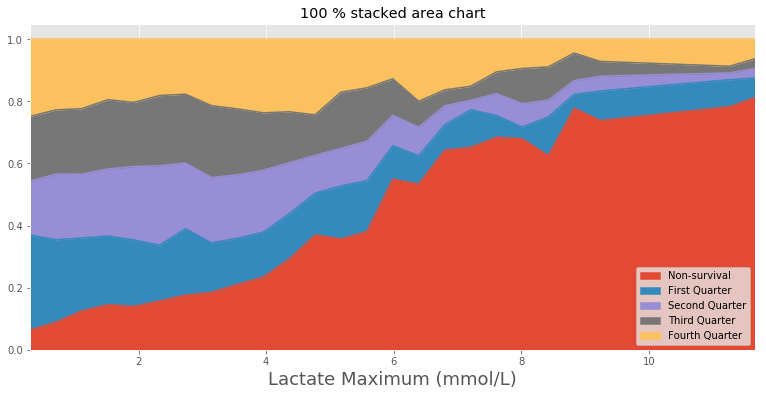

In [54]:
_df3_max = _df2_max.divide(_df2_max.sum(axis=1), axis=0)
_df3_max.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6))
fig = plt.gcf()
ax = plt.gca()
plt.xlabel('Lactate Maximum (mmol/L)', fontsize=18)
#_df2

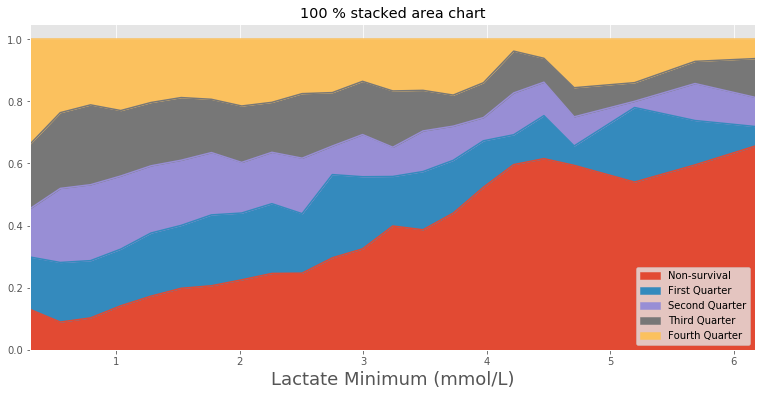

In [53]:
_df3_min = _df2_min.divide(_df2_min.sum(axis=1), axis=0)
_df3_min.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6))
fig = plt.gcf()
ax = plt.gca()
plt.xlabel('Lactate Minimum (mmol/L)', fontsize=18)
#_df2

In [ ]:
#_df2